In [1]:
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
fname = 'trip_purpose_mode'
pd.options.display.float_format = '{:0,.2f}'.format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Trip Mode Share

In [4]:
pd.options.display.float_format = '{:,.1%}'.format

df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = (df_model.groupby('mode').sum()[['trexpfac']]/df_model['trexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('mode').sum()[['trexpfac']]/df_survey['trexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='mode', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Trip Mode',' Model',' Survey']
df.index = df['Trip Mode']
df.drop('Trip Mode', axis=1, inplace=True)
df

,Model,Survey
Trip Mode,,
Bike,1.6%,0.9%
HOV2,23.1%,22.9%
HOV3+,15.9%,15.9%
SOV,41.4%,42.4%
School Bus,2.0%,1.3%
TNC,1.0%,0.3%
Transit,2.7%,3.7%
Walk,12.3%,11.6%


<AxesSubplot:ylabel='Trip Mode'>

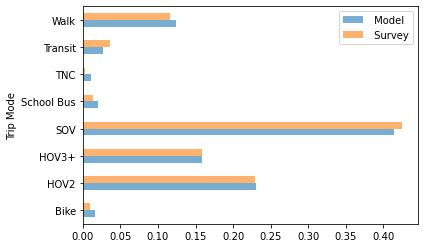

In [5]:
df.plot(kind='barh', alpha=0.6)

# Trip Mode Share - Pierce County

In [6]:
df_model_pierce = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey_pierce = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))

df_model_pierce = df_model_pierce[df_model_pierce['person_county'] == 'Pierce']
df_survey_pierce = df_survey_pierce[df_survey_pierce['person_county'] == 'Pierce']

df_model_pierce = (df_model_pierce.groupby('mode').sum()[['trexpfac']]/df_model_pierce['trexpfac'].sum()).reset_index()
df_survey_pierce = (df_survey_pierce.groupby('mode').sum()[['trexpfac']]/df_survey_pierce['trexpfac'].sum()).reset_index()
df = df_model_pierce.merge(df_survey_pierce, on='mode', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Trip Mode',' Model',' Survey']
df.index = df['Trip Mode']
df.drop('Trip Mode', axis=1, inplace=True)
df

,Model,Survey
Trip Mode,,
Bike,1.5%,0.2%
HOV2,24.7%,24.4%
HOV3+,17.3%,15.9%
SOV,41.6%,47.4%
School Bus,2.3%,2.1%
TNC,0.8%,0.1%
Transit,1.2%,2.0%
Walk,10.7%,6.9%


<AxesSubplot:ylabel='Trip Mode'>

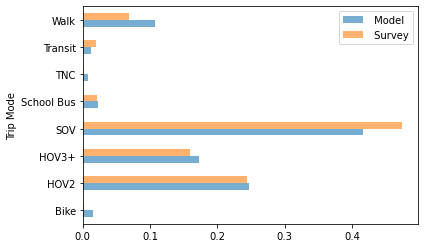

In [7]:
df.plot(kind='barh', alpha=0.6)

# Work Trip Mode Share

In [8]:
df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[df_model['dpurp'] == 'Work']
df_survey = df_survey[df_survey['dpurp'] == 'Work']
df_model = (df_model.groupby('mode').sum()[['trexpfac']]/df_model['trexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('mode').sum()[['trexpfac']]/df_survey['trexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='mode', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Trip Mode',' Model',' Survey']
df.index = df['Trip Mode']
df.drop('Trip Mode', axis=1, inplace=True)
df

,Model,Survey
Trip Mode,,
Bike,1.4%,0.8%
HOV2,10.4%,10.9%
HOV3+,4.9%,4.0%
SOV,65.2%,67.0%
School Bus,0.0%,0.0%
TNC,2.5%,0.3%
Transit,5.5%,5.7%
Walk,9.9%,10.6%


<AxesSubplot:ylabel='Trip Mode'>

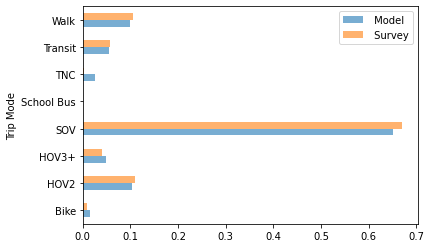

In [9]:
df.plot(kind='barh', alpha=0.6)

# Work Trip Mode - Pierce County

In [10]:
df_model_pierce = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey_pierce = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))

df_model_pierce = df_model_pierce[df_model_pierce['person_county'] == 'Pierce']
df_survey_pierce = df_survey_pierce[df_survey_pierce['person_county'] == 'Pierce']

df_model_pierce = df_model_pierce[df_model_pierce['dpurp'] == 'Work']
df_survey_pierce = df_survey_pierce[df_survey_pierce['dpurp'] == 'Work']
df_model_pierce = (df_model_pierce.groupby('mode').sum()[['trexpfac']]/df_model_pierce['trexpfac'].sum()).reset_index()
df_survey_pierce = (df_survey_pierce.groupby('mode').sum()[['trexpfac']]/df_survey_pierce['trexpfac'].sum()).reset_index()
df = df_model_pierce.merge(df_survey_pierce, on='mode', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Trip Mode',' Model',' Survey']
df.index = df['Trip Mode']
df.drop('Trip Mode', axis=1, inplace=True)
df

,Model,Survey
Trip Mode,,
Bike,1.2%,0.2%
HOV2,11.2%,13.8%
HOV3+,5.2%,4.8%
SOV,71.3%,73.1%
School Bus,0.0%,NaN
TNC,1.8%,0.1%
Transit,3.2%,2.7%
Walk,6.1%,4.9%


<AxesSubplot:ylabel='Trip Mode'>

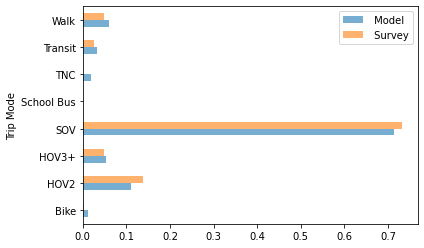

In [11]:
df.plot(kind='barh', alpha=0.6)

# School Trip Mode Share

In [12]:
df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[df_model['dpurp'] == 'School']
df_survey = df_survey[df_survey['dpurp'] == 'School']
df_model = (df_model.groupby('mode').sum()[['trexpfac']]/df_model['trexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('mode').sum()[['trexpfac']]/df_survey['trexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='mode', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Trip Mode',' Model',' Survey']
df.index = df['Trip Mode']
df.drop('Trip Mode', axis=1, inplace=True)
df

,Model,Survey
Trip Mode,,
Bike,3.8%,0.6%
HOV2,24.7%,19.7%
HOV3+,26.1%,31.0%
SOV,9.5%,11.4%
School Bus,19.0%,16.4%
TNC,1.9%,0.1%
Transit,3.4%,5.9%
Walk,11.5%,8.9%


<AxesSubplot:ylabel='Trip Mode'>

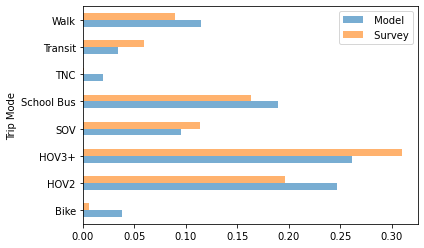

In [13]:
df.plot(kind='barh', alpha=0.6)

# School Trip Mode - Pierce County

In [14]:
df_model_pierce = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey_pierce = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))

df_model_pierce = df_model_pierce[df_model_pierce['person_county'] == 'Pierce']
df_survey_pierce = df_survey_pierce[df_survey_pierce['person_county'] == 'Pierce']

df_model_pierce = df_model_pierce[df_model_pierce['dpurp'] == 'School']
df_survey_pierce = df_survey_pierce[df_survey_pierce['dpurp'] == 'School']
df_model_pierce = (df_model_pierce.groupby('mode').sum()[['trexpfac']]/df_model_pierce['trexpfac'].sum()).reset_index()
df_survey_pierce = (df_survey_pierce.groupby('mode').sum()[['trexpfac']]/df_survey_pierce['trexpfac'].sum()).reset_index()
df = df_model_pierce.merge(df_survey_pierce, on='mode', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Trip Mode',' Model',' Survey']
df.index = df['Trip Mode']
df.drop('Trip Mode', axis=1, inplace=True)
df

,Model,Survey
Trip Mode,,
Bike,3.5%,NaN
HOV2,25.2%,14.6%
HOV3+,26.8%,34.1%
SOV,10.4%,19.8%
School Bus,19.8%,23.7%
TNC,2.1%,NaN
Transit,1.6%,0.5%
Walk,10.7%,5.5%


<AxesSubplot:ylabel='Trip Mode'>

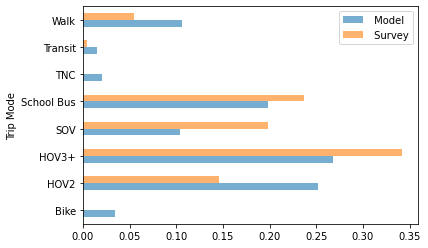

In [15]:
df.plot(kind='barh', alpha=0.6)

# Escort Tour Mode

In [16]:
df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[df_model['dpurp'] == 'Escort']
df_survey = df_survey[df_survey['dpurp'] == 'Escort']
df_model = (df_model.groupby('mode').sum()[['trexpfac']]/df_model['trexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('mode').sum()[['trexpfac']]/df_survey['trexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='mode', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Trip Mode',' Model',' Survey']
df.index = df['Trip Mode']
df.drop('Trip Mode', axis=1, inplace=True)
df

,Model,Survey
Trip Mode,,
Bike,2.5%,0.7%
HOV2,32.0%,36.5%
HOV3+,24.7%,29.6%
SOV,31.7%,27.1%
School Bus,0.3%,1.2%
TNC,0.1%,0.0%
Transit,0.6%,0.5%
Walk,8.0%,4.0%


<AxesSubplot:ylabel='Trip Mode'>

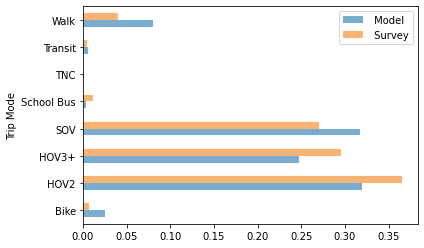

In [17]:
df.plot(kind='barh', alpha=0.6)

# Escort Trip Mode - Pierce County

In [18]:
df_model_pierce = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey_pierce = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))

df_model_pierce = df_model_pierce[df_model_pierce['person_county'] == 'Pierce']
df_survey_pierce = df_survey_pierce[df_survey_pierce['person_county'] == 'Pierce']

df_model_pierce = df_model_pierce[df_model_pierce['dpurp'] == 'Escort']
df_survey_pierce = df_survey_pierce[df_survey_pierce['dpurp'] == 'Escort']
df_model_pierce = (df_model_pierce.groupby('mode').sum()[['trexpfac']]/df_model_pierce['trexpfac'].sum()).reset_index()
df_survey_pierce = (df_survey_pierce.groupby('mode').sum()[['trexpfac']]/df_survey_pierce['trexpfac'].sum()).reset_index()
df = df_model_pierce.merge(df_survey_pierce, on='mode', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Trip Mode',' Model',' Survey']
df.index = df['Trip Mode']
df.drop('Trip Mode', axis=1, inplace=True)
df

,Model,Survey
Trip Mode,,
Bike,2.4%,0.1%
HOV2,32.2%,39.6%
HOV3+,25.5%,30.9%
SOV,32.0%,28.0%
School Bus,0.3%,0.0%
TNC,0.1%,NaN
Transit,0.3%,0.3%
Walk,7.1%,0.3%


<AxesSubplot:ylabel='Trip Mode'>

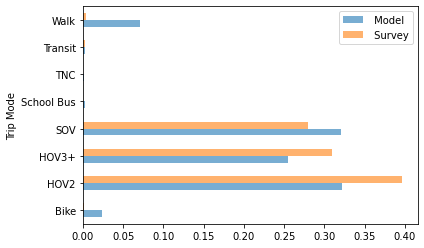

In [19]:
df.plot(kind='barh', alpha=0.6)

# Other Trip Mode

In [20]:
df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
df_model = df_model[-df_model['dpurp'].isin(['School','Work','Escort'])]
df_survey = df_survey[-df_survey['dpurp'].isin(['School','Work','Escort'])]
df_model = (df_model.groupby('mode').sum()[['trexpfac']]/df_model['trexpfac'].sum()).reset_index()
df_survey = (df_survey.groupby('mode').sum()[['trexpfac']]/df_survey['trexpfac'].sum()).reset_index()
df = df_model.merge(df_survey, on='mode', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Trip Mode',' Model',' Survey']
df.index = df['Trip Mode']
df.drop('Trip Mode', axis=1, inplace=True)
df

,Model,Survey
Trip Mode,,
Bike,1.4%,1.0%
HOV2,24.6%,24.4%
HOV3+,16.5%,16.4%
SOV,39.6%,40.1%
School Bus,1.5%,0.9%
TNC,0.8%,0.3%
Transit,2.3%,3.4%
Walk,13.4%,12.8%


<AxesSubplot:ylabel='Trip Mode'>

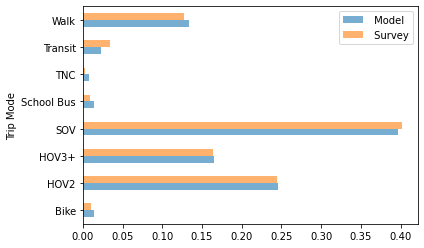

In [21]:
df.plot(kind='barh', alpha=0.6)

# Other Trip Mode - Pierce County

In [22]:
df_model_pierce = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
df_survey_pierce = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))

df_model_pierce = df_model_pierce[df_model_pierce['person_county'] == 'Pierce']
df_survey_pierce = df_survey_pierce[df_survey_pierce['person_county'] == 'Pierce']

df_model_pierce = df_model_pierce[-df_model_pierce['dpurp'].isin(['School','Work','Escort'])]
df_survey_pierce = df_survey_pierce[-df_survey_pierce['dpurp'].isin(['School','Work','Escort'])]
df_model_pierce = (df_model_pierce.groupby('mode').sum()[['trexpfac']]/df_model_pierce['trexpfac'].sum()).reset_index()
df_survey_pierce = (df_survey_pierce.groupby('mode').sum()[['trexpfac']]/df_survey_pierce['trexpfac'].sum()).reset_index()
df = df_model_pierce.merge(df_survey_pierce, on='mode', suffixes=['_model','_survey'], how = 'outer')
df.columns = ['Trip Mode',' Model',' Survey']
df.index = df['Trip Mode']
df.drop('Trip Mode', axis=1, inplace=True)
df

,Model,Survey
Trip Mode,,
Bike,1.3%,0.2%
HOV2,26.2%,25.8%
HOV3+,17.8%,15.8%
SOV,39.7%,45.2%
School Bus,1.6%,1.5%
TNC,0.6%,0.2%
Transit,0.9%,2.1%
Walk,12.0%,8.0%


<AxesSubplot:ylabel='Trip Mode'>

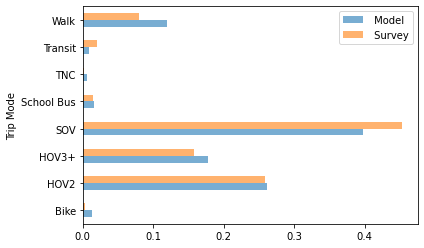

In [23]:
df.plot(kind='barh', alpha=0.6)